In [53]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [37]:
data=pd.read_csv("C:/Users/archi/Desktop/Sales forecasting Kaggle/sales_train_v2.csv")

In [38]:
test=pd.read_csv("C:/Users/archi/Desktop/Sales forecasting Kaggle/test/test.csv")

In [39]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [40]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [41]:
data['date'] = data['date'].apply(lambda x: datetime.strptime(x,'%d.%m.%Y'))

In [42]:
print(data.dtypes)
data['date_block_num'] = data['date_block_num'].astype(str)
data['shop_id'] = data['shop_id'].astype(str)
data['item_id'] = data['item_id'].astype(str)
print(data.dtypes)

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object
date              datetime64[ns]
date_block_num            object
shop_id                   object
item_id                   object
item_price               float64
item_cnt_day             float64
dtype: object


In [43]:
data.describe()

,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06
mean,8.908532e+02,1.242641e+00
std,1.729800e+03,2.618834e+00
min,-1.000000e+00,-2.200000e+01
25%,2.490000e+02,1.000000e+00
50%,3.990000e+02,1.000000e+00
75%,9.990000e+02,1.000000e+00
max,3.079800e+05,2.169000e+03


In [44]:
data.apply(lambda x:sum(x.isnull()),axis=0)

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

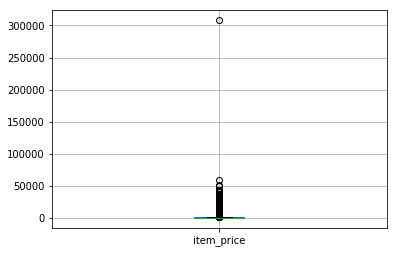

In [45]:
data.boxplot(column = 'item_price')
plt.show()

In [46]:
data["shop_id"].unique()

array(['59', '25', '24', '23', '19', '22', '18', '21', '28', '27', '29',
       '26', '4', '6', '2', '3', '7', '0', '1', '16', '15', '8', '10',
       '14', '13', '12', '53', '31', '30', '32', '35', '56', '54', '47',
       '50', '42', '43', '52', '51', '41', '38', '44', '37', '46', '45',
       '5', '57', '58', '55', '17', '9', '49', '39', '40', '48', '34',
       '33', '20', '11', '36'], dtype=object)

In [47]:
data["item_id"].unique()

array(['22154', '2552', '2554', ..., '7610', '7635', '7640'], dtype=object)

In [48]:
data["date_block_num"].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype=object)

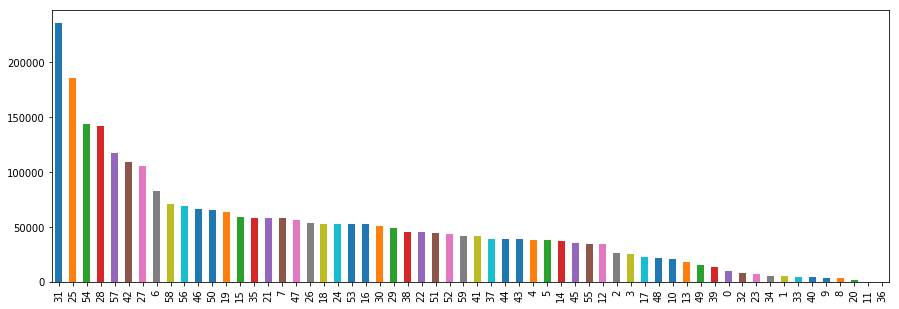

In [49]:
data['shop_id'].value_counts().plot(kind='bar',figsize=(15, 5))

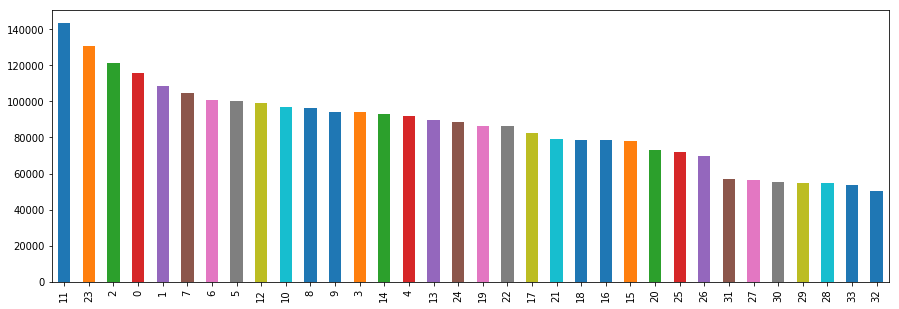

In [50]:
data['date_block_num'].value_counts().plot(kind='bar',figsize=(15, 5))

In [51]:
#data['item_id'].value_counts().plot(kind='bar',figsize=(15, 5))
data['item_id'].value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
7856      6602
3732      6475
2308      6320
4870      5811
3734      5805
1855      5681
5821      5389
16787     5283
6675      5122
7894      5107
2445      5056
1830      4976
5823      4974
6497      4904
5272      4853
13071     4804
6740      4675
3183      4615
4178      4527
2416      4487
7893      4380
6466      4324
6498      4278
6503      4274
6457      4269
         ...  
9938         1
7189         1
18252        1
377          1
12287        1
10752        1
5772         1
5693         1
16835        1
5379         1
6022         1
16552        1
13083        1
3246         1
873          1
17745        1
7555         1
340          1
11262        1
12846        1
2612         1
747          1
19355        1
4157         1
14577        1
14285        1
18250        1
17693        1
7753         1
9236         1
Name: item_id, Length: 21807, dtype: int64

### Feature Engineering 

In [52]:
modified = data.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)
train_df = modified.reset_index()
train_df['shop_id']= train_df.shop_id.astype('str')
train_df['item_id']= train_df.item_id.astype('str')
train_df.head()

date_block_num,shop_id,item_id,0,1,10,11,12,13,14,15,...,30,31,32,33,4,5,6,7,8,9
0,0,1000,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,10004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,10012,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1002,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
train_df = train_df[['shop_id', 'item_id','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33']]
train_df.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,1000,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,10004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,10012,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1002,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_train=train_df.iloc[:,  (train_cleaned_df.columns != 33)].values
y_train=train_df.iloc[:, train_cleaned_df.columns == 33].values

## Modelling

### 1)Random Forest Regressor

In [56]:
rf = RandomForestRegressor(random_state = 10)
# Train the model on training data
rf.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
rmse_dmy = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
print('RMSE: %.4f' % rmse_dmy)

C:\Users\archi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\archi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 1.4613


### 2)Random Forest with Grid Search

In [61]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10],
    #'max_features': [20],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100,500]
}
# Create a based model
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

rmse_dmy = np.sqrt(mean_squared_error(y_train, grid_search.predict(X_train)))
print('RMSE: %.4f' % rmse_dmy)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  4.1min remaining: 12.3min
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 18.7min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 18.8min finished
C:\Users\archi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RMSE: 2.9363


### 3)XGBoost

In [63]:
import xgboost as xgb
param = {'max_depth':12,
         'subsample':1,  
         'min_child_weight':0.5,  
         'eta':0.3,
         'num_round':1000, 
         'seed':42,  
         'silent':0,
         'eval_metric':'rmse',
         'early_stopping_rounds':100
        }

progress = dict()
xgbtrain = xgb.DMatrix(X_train, y_train)
watchlist  = [(xgbtrain,'train-rmse')]
bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(X_train))
rmse_dmy = np.sqrt(mean_squared_error(y_train,preds))
print('RMSE: %.4f' % rmse_dmy)

RMSE: 1.2030


### Stacking

In [66]:
preds_XG = bst.predict(xgb.DMatrix(X_train))
preds_RFCV = grid_search.predict(X_train)

## Stacking 
Stacking_data_Train=pd.DataFrame( {'RandomForest':preds_RFCV,'CGB':preds_XG})


In [69]:

param = {'max_depth':12,
         'subsample':1,  
         'min_child_weight':0.5,  
         'eta':0.3,
         'num_round':1000, 
         'seed':42,  
         'silent':0,
         'eval_metric':'rmse',
         'early_stopping_rounds':100
        }

progress = dict()
xgbtrain_2 = xgb.DMatrix(Stacking_data_Train, y_train)
watchlist_2  = [(xgbtrain_2,'train-rmse')]
bst2 = xgb.train(param, xgbtrain_2)
preds = bst2.predict(xgb.DMatrix(Stacking_data_Train))
rmse_dmy = np.sqrt(mean_squared_error(y_train,preds))
print('RMSE: %.4f' % rmse_dmy)

RMSE: 1.0165


### Prediction for test data

In [71]:
test_df = test.copy()
test_df['shop_id']= test_df.shop_id.astype('str')
test_df['item_id']= test_df.item_id.astype('str')

test_df = test_df.merge(train_df, how = "left", on = ["shop_id", "item_id"]).fillna(0.0)
test_df.head()


,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
test_df.columns =['ID','shop_id','item_id','-1','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']
test_df.head()

,ID,shop_id,item_id,-1,0,1,2,3,4,5,...,23,24,25,26,27,28,29,30,31,32
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X_test = test_df.iloc[:, (test_df.columns != 'ID') & (test_df.columns != '-1')].values

In [94]:
preds_XG = bst.predict(xgb.DMatrix(X_test))
preds_RFCV = grid_search.predict(X_test)

## Stacking 
Stacking_data_Test=pd.DataFrame( {'RandomForest':preds_RFCV,'CGB':preds_XG})


In [95]:
preds_vf = bst2.predict(xgb.DMatrix(Stacking_data_Test))

In [97]:
preds_vf = list(map(lambda x: min(20,max(x,0)), list(preds_vf)))
final = pd.DataFrame({'ID':test_df.ID,'item_cnt_month': preds_vf })

In [100]:
final.to_csv('Stacking_RFCV_XGB.csv',index=False)